In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("/content/wine_data.csv" , header = None , usecols=[0,1,2])
df.columns = ["Class label","Alcohal" ,"Malic acid"]

In [5]:
df

,Class label,Alcohal,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohal', ylabel='Density'>

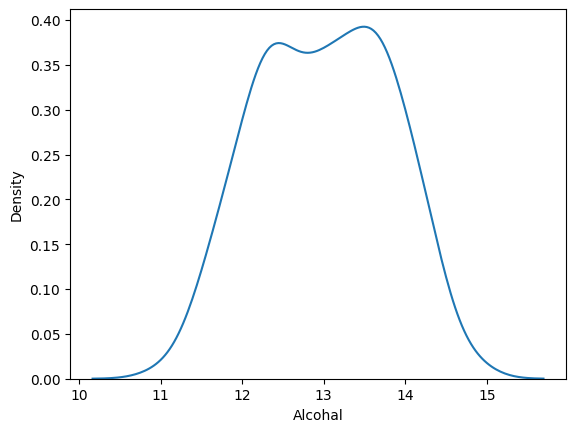

In [6]:
sns.kdeplot(df["Alcohal"])

<Axes: xlabel='Malic acid', ylabel='Density'>

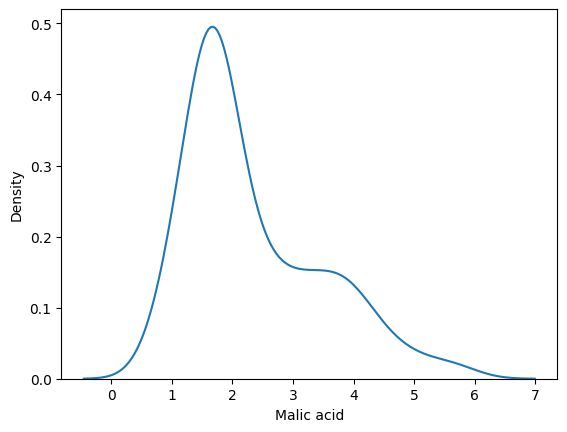

In [7]:
sns.kdeplot(df["Malic acid"])

<Axes: xlabel='Alcohal', ylabel='Malic acid'>

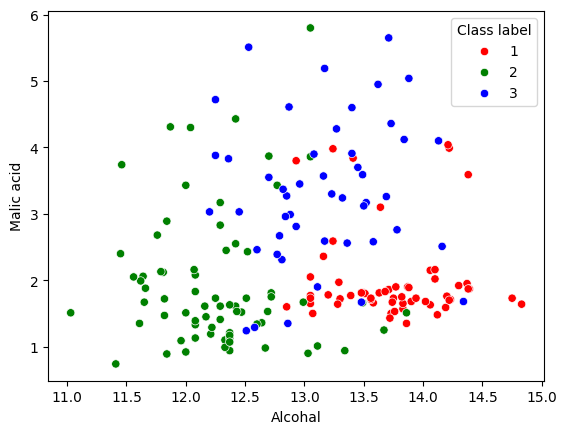

In [9]:
color_dict = {1:"red",2:"green",3:"blue"}
sns.scatterplot(data=df ,x=df["Alcohal"],y=df["Malic acid"] , hue = df["Class label"] , palette = color_dict)

In [10]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test=train_test_split(df.drop('Class label' , axis = 1), df['Class label'] , test_size = 0.3 , random_state = 0)

In [11]:
X_train.shape , X_test.shape

((124, 2), (54, 2))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#fit the scaler to training set
scaler.fit(X_train)
#transform train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [15]:
np.round(X_train.describe(),1)

,Alcohal,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [16]:
np.round(X_train_scaled.describe(),1)

,Alcohal,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


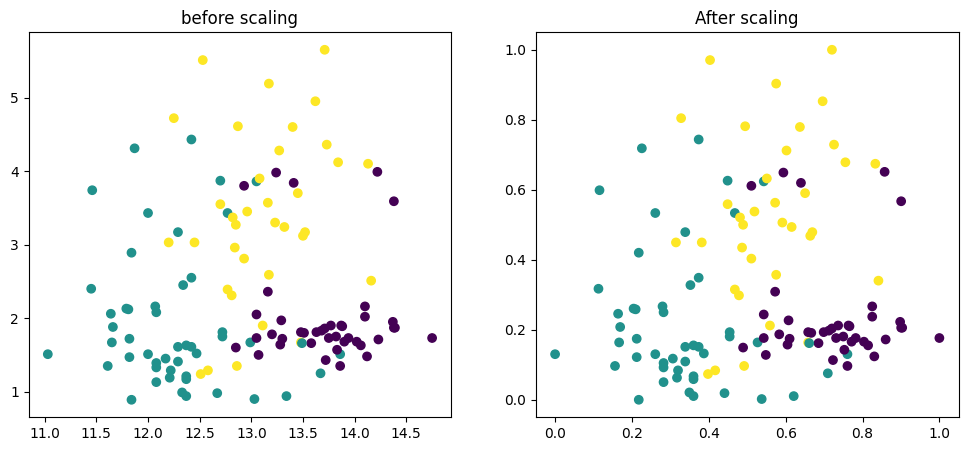

In [18]:
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(12,5))
ax1.scatter(X_train['Alcohal'],X_train['Malic acid'] , c =y_train)
ax1.set_title('before scaling')
ax2.scatter(X_train_scaled['Alcohal'] , X_train_scaled['Malic acid'] , c = y_train)
ax2.set_title("After scaling")
plt.show()

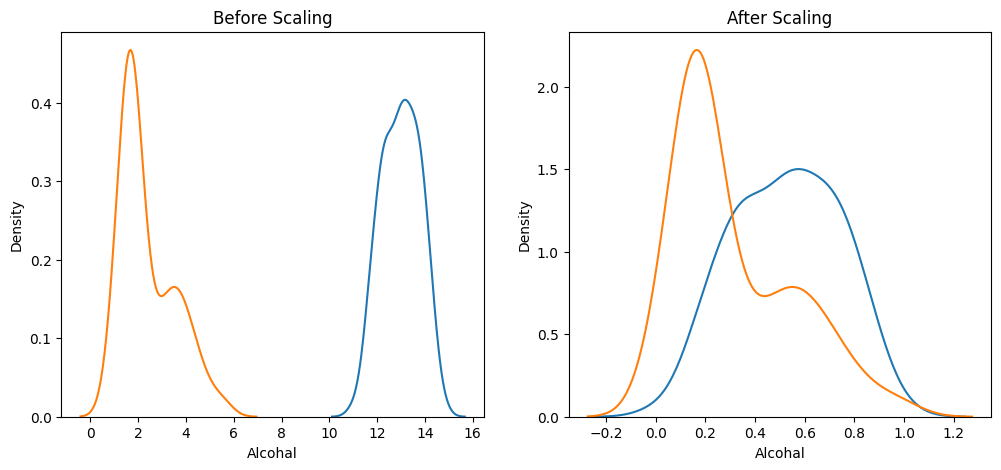

In [20]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2,figsize = (12 , 5) )
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohal'],ax = ax1)
sns.kdeplot(X_train['Malic acid'], ax = ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohal'], ax = ax2)
sns.kdeplot(X_train_scaled['Malic acid'] , ax = ax2)
plt.show()

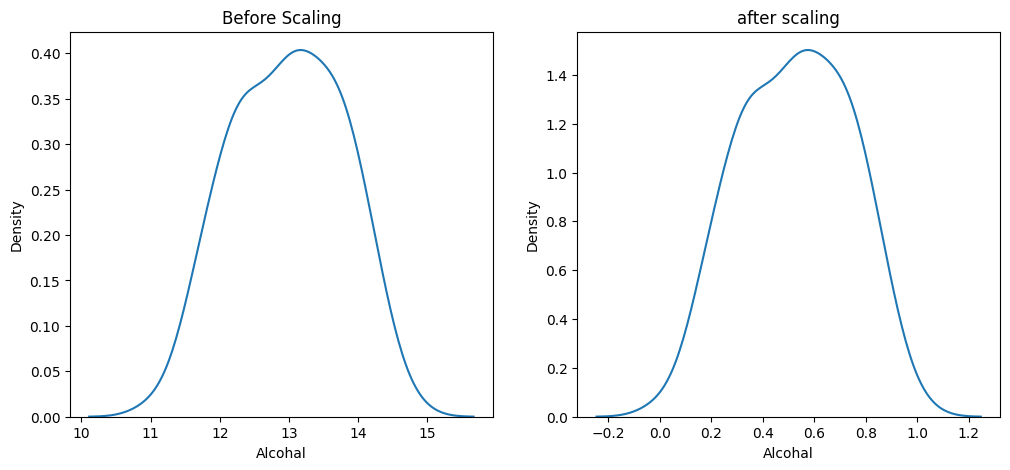

In [21]:
fig, (ax1 , ax2) = plt.subplots(ncols = 2 , figsize=(12 , 5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohal'] , ax = ax1)

ax2.set_title('after scaling')
sns.kdeplot(X_train_scaled['Alcohal'] , ax = ax2)
plt.show()